In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
class KMeansClustering:
    def __init__(self, K=3, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.K, replace=False)]

    def assign_clusters(self, data):
        clusters = [[] for _ in range(self.K)]
        for point in data:
            distances = [self.euclidean_distance(point, centroid) for centroid in self.centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        return clusters

    def compute_new_centroids(self, clusters):
        return np.array([np.mean(cluster, axis=0) if cluster else self.centroids[i]
                         for i, cluster in enumerate(clusters)])

    def fit(self, data):
        self.initialize_centroids(data)
        for _ in range(self.max_iters):
            self.clusters = self.assign_clusters(data)
            new_centroids = self.compute_new_centroids(self.clusters)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, data):
        predictions = []
        for point in data:
            distances = [self.euclidean_distance(point, centroid) for centroid in self.centroids]
            cluster_index = np.argmin(distances)
            predictions.append(cluster_index)
        return predictions

    def accuracy(self, true_labels, predicted_labels):
        from scipy.stats import mode
        label_map = {}
        for i in range(self.K):
            # Check if the subset is empty before calling mode
            if np.any(np.array(predicted_labels) == i):
                mode_result = mode(true_labels[np.array(predicted_labels) == i])
                # Access mode value depending on whether it's scalar or array
                mode_label = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
            else:
                # Handle the empty subset case
                mode_label = -1  # Or any other default value

            label_map[i] = mode_label
        mapped_predictions = np.array([label_map[label] for label in predicted_labels])
        return np.mean(mapped_predictions == true_labels)

    def plot_clusters(self, data, predicted_labels, title):
        plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', alpha=0.6, edgecolors='k')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

In [4]:
iris = datasets.load_iris()
data = iris.data[:, :2]  # Using first two features for visualization
true_labels = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, true_labels, test_size=0.2, random_state=42)

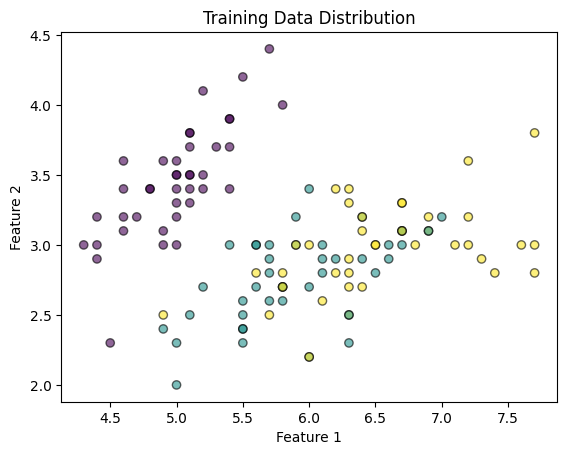

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6, edgecolors='k')
plt.title("Training Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [8]:
kmeans = KMeansClustering(K=3)
kmeans.fit(X_train)
predicted_labels_train = kmeans.predict(X_train)
predicted_labels_test = kmeans.predict(X_test)

In [9]:
for i, cluster in enumerate(kmeans.clusters):
    print(f"Cluster {i+1}: {len(cluster)} points")

Cluster 1: 36 points
Cluster 2: 45 points
Cluster 3: 39 points


In [10]:
train_accuracy = kmeans.accuracy(y_train, predicted_labels_train)
test_accuracy = kmeans.accuracy(y_test, predicted_labels_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 80.00%
Testing Accuracy: 90.00%


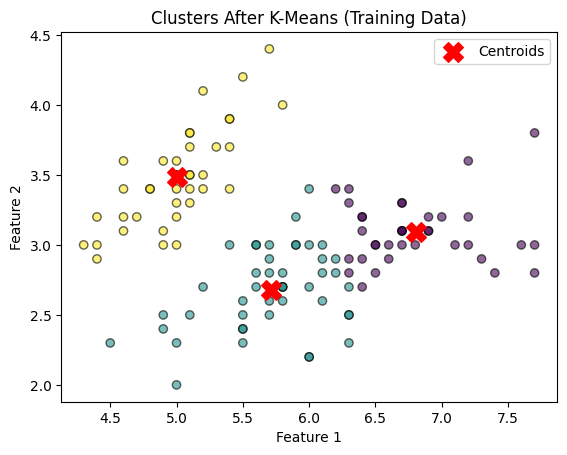

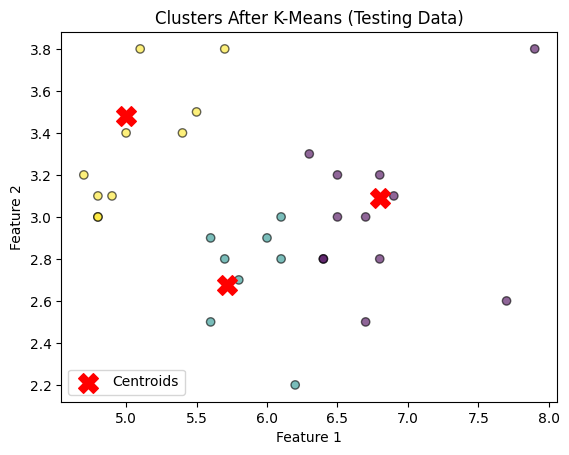

In [11]:
kmeans.plot_clusters(X_train, predicted_labels_train, "Clusters After K-Means (Training Data)")
kmeans.plot_clusters(X_test, predicted_labels_test, "Clusters After K-Means (Testing Data)")